In [36]:
import pandas as pd

freq_list = []
app_list = []

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter


In [3]:
df = pd.read_csv (r'SPEC_GPU_P100_Features.csv')

In [4]:
df_new = df[['clocks.current.sm [MHz]','power.draw [W]','base_run_time','app']]

In [5]:
df_new2 = df_new.groupby(['app','clocks.current.sm [MHz]']).mean()

In [6]:
df_new2

power.draw [W]  base_run_time
app   clocks.current.sm [MHz]                               
bfs   544                           44.099349      23.000000
      556                           43.249835      23.000000
      569                           43.623768      24.052088
      582                           44.591933      24.000000
      594                           44.752410      24.000000
...                                       ...            ...
tpacf 1278                          75.969910      26.000000
      1290                          77.623628      26.000000
      1303                          80.764064      27.000000
      1316                          81.673987      27.000000
      1328                          82.791013      28.000000

[1197 rows x 2 columns]

In [7]:
df_new2['energy'] = df_new2['power.draw [W]'] * df_new2['base_run_time']
df_new2['energy']

app    clocks.current.sm [MHz]
bfs    544                        1014.285017
       556                         994.746195
       569                        1049.242721
       582                        1070.206398
       594                        1074.057836
                                     ...     
tpacf  1278                       1975.217667
       1290                       2018.214333
       1303                       2180.629731
       1316                       2205.197654
       1328                       2318.148359
Name: energy, Length: 1197, dtype: float64

In [8]:
df_new3 = df_new2.groupby(['app'])


In [9]:
df4 = pd.read_csv('finalOutput1.csv')


In [10]:
dfAppEnergy = df4.groupby(['app']).mean().reset_index()

In [11]:
dfAppEnergy

,app,clocks.current.sm [MHz],power.draw [W],base_run_time,energy
0,bfs,936.079365,48.435767,23.907581,1159.737709
1,bplustree,936.079365,67.320776,33.063675,2290.159343
2,cfd,936.079365,72.324024,20.071120,1467.820580
3,cutcp,936.079365,66.266157,15.444444,1077.651013
4,fft,936.079365,105.255615,15.542011,1720.218885
5,ge,936.079365,57.225486,13.857143,810.758334
6,heartwall,936.079365,54.898102,51.079365,2890.309249
7,histo,936.079365,30.627870,47.699699,1460.839670
8,hotspot,936.079365,73.769107,21.679338,1664.143239
9,kmeans,936.079365,32.858199,62.158730,2043.481426


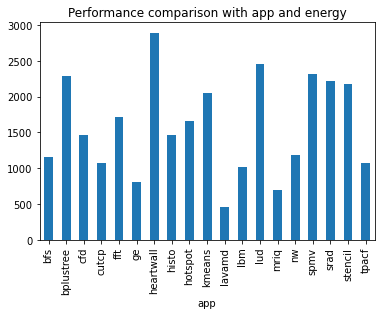

In [12]:
dfAppEnergy.plot(kind='bar', x='app', y='energy', legend=None, title='Performance comparison with app and energy')
plt.show()

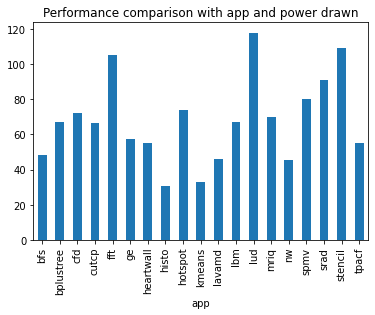

In [13]:
dfAppEnergy.plot(kind='bar', x='app', y='power.draw [W]', legend=None, title='Performance comparison with app and power drawn')
plt.show()

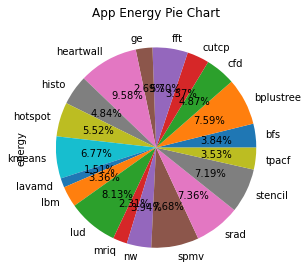

In [14]:
dfAppEnergy.plot(kind='pie', labels=dfAppEnergy['app'], y='energy', legend=None, autopct='%.2f%%', title='App Energy Pie Chart')
plt.tight_layout()
plt.show()

In [17]:
dfAppEnergy.index = dfAppEnergy['app']

In [19]:
dfAppEnergy = dfAppEnergy.sort_values(by='energy',ascending=False)

In [21]:
dfAppEnergy["cumpercentage"] = dfAppEnergy["energy"].cumsum()/dfAppEnergy["energy"].sum()*100

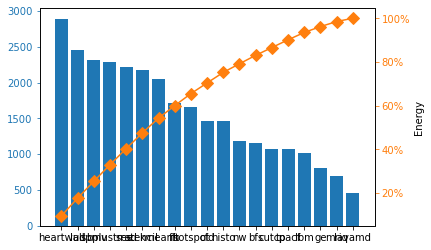

In [47]:
fig, ax = plt.subplots()
ax.bar(dfAppEnergy.index, dfAppEnergy["energy"], color="C0")
ax2 = ax.twinx()
ax2.plot(dfAppEnergy.index, dfAppEnergy["cumpercentage"], color="C1", marker="D", ms=9)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.xlabel('App')
plt.ylabel('Energy')
plt.show()

In [4]:
df.rename({"power.draw [W]":"power_draw",'clocks.current.sm [MHz]' : 'clocks_current_sm'}, axis=1, inplace=True)
req_columns = ['clocks_current_sm','app']

In [8]:
for i,column in enumerate(req_columns):
	if i == 0:
		for freq in df[column]:
			if freq not in freq_list:
				freq_list.append(freq)
	else:
		for app in df[column]:
			if app not in app_list:
				app_list.append(app)

In [9]:
df_req = pd.DataFrame(index=freq_list, columns=app_list)
df_req = df_req.fillna(0)

In [12]:
for i in df.itertuples():
	##if df_req[i.app][i.clocks_current_sm] != 0:
		##df_req[i.app][i.clocks_current_sm] = (df_req[i.app][i.clocks_current_sm]+
											 ##(i.power_draw*i.base_run_time))/2
	##else:
		df_req[i.app][i.clocks_current_sm] = i.power_draw*i.base_run_time

KeyboardInterrupt: 

In [11]:
df_req

,bfs,bplustree,cfd,cutcp,fft,ge,heartwall,lbm,histo,hotspot,kmeans,lavamd,lud,mriq,nw,spmv,srad,stencil,tpacf
1012,701,1889,625,926,481,415,1581,445,1386,653,1861,291,609,264,1047,880,732,0,0
607,626,1236,511,302,310,301,1101,327,1267,492,1764,244,1189,210,530,783,586,0,0
1025,697,1866,588,469,1473,408,1589,441,1363,1470,1932,290,600,291,758,870,749,0,0
1037,701,1034,588,470,800,693,1589,442,1421,1126,1824,290,605,291,788,1095,720,0,0
1050,962,1036,592,470,475,441,2120,445,1371,681,1930,291,636,291,792,878,728,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,681,889,543,398,408,372,2107,370,1410,1156,1849,253,530,226,656,845,828,0,0
898,683,892,544,398,408,371,1377,402,1357,593,1787,253,1640,255,654,823,1065,0,0
949,1146,1695,579,433,441,376,2245,819,1343,607,1976,285,1169,257,692,857,0,0,0
974,1104,963,671,437,1348,407,2338,622,1438,612,1962,258,598,259,732,860,0,0,0


In [13]:
df_req.to_csv('output.csv',encoding='utf-8')